In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pytesseract import pytesseract 

from ColorSegment import *

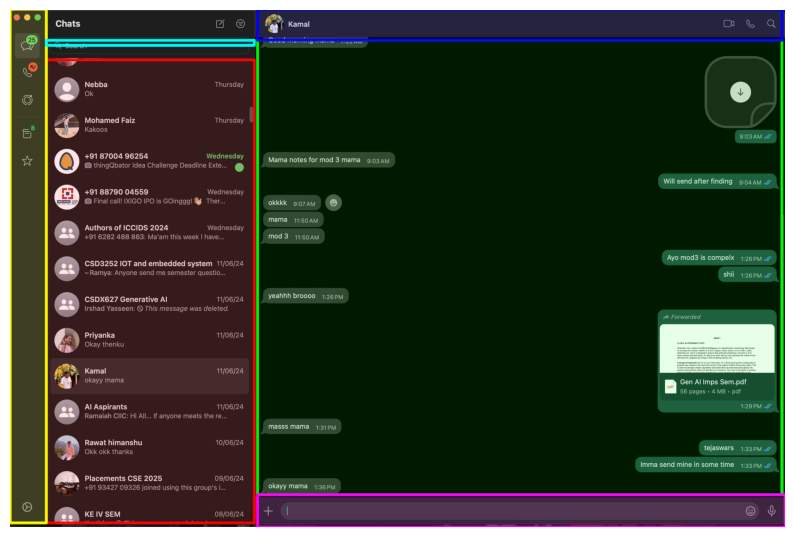

In [2]:
img_path = "Screenshot 2024-06-18 at 10.56.48 PM.png"
whatsapp_image = cv.imread(img_path)
bboxes = WhatsappSegment(whatsapp_image, alpha=0.1, show=True)

No circles were found


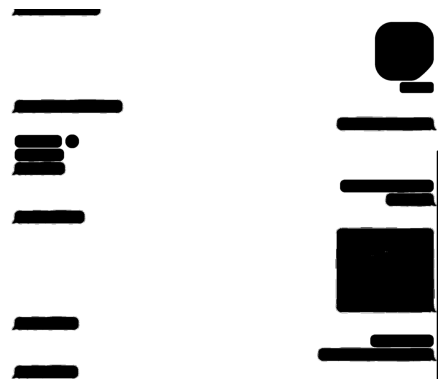

In [3]:
chat_mask_circle_removed = remove_circle(img_path, ismask=False, bbox=bboxes['chat_bbox'], show=True)

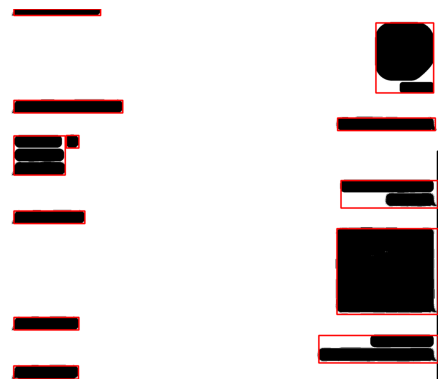

[(18, 0, 425, 30),
 (1718, 65, 1989, 394),
 (18, 429, 529, 488),
 (1538, 512, 1997, 571),
 (264, 594, 323, 653),
 (18, 596, 259, 780),
 (1554, 806, 2010, 935),
 (18, 949, 351, 1008),
 (1535, 1032, 2010, 1435),
 (18, 1449, 323, 1508),
 (1450, 1534, 2010, 1663),
 (17, 1677, 321, 1739)]

In [8]:
message_bbox = chat_message_bbox(chat_mask_circle_removed, show=True, blur=20)
message_bbox = sorted(message_bbox, key=lambda x: x[1])
message_bbox

In [48]:
labels = whosaid(message_bbox=message_bbox)

In [44]:
chats = {}

chat_bbox = bboxes['chat_bbox']
chat_image = whatsapp_image[chat_bbox[1]:chat_bbox[3], chat_bbox[0]:chat_bbox[2]]
for label, message_box in enumerate(message_bbox):
    message = chat_image[message_box[1]:message_box[3], message_box[0]:message_box[2]]
    message_text = pytesseract.image_to_string(message)
    if labels[label] == 0 : chats[f"Sender {label}"] = message_text
    else: chats[f"User {label}"] = message_text
    print(message_text)


9:03AM 4

Mama notes for mod 3 mama_ 9:03AM

Will send after finding 9:04am YW


okkkk 9:07AM
mama 11:50AM

mod 3 11:50AM

Ayo mod3 is compelx 1:26PM

shii 1:26PM

yeahhh broooo 1:26PM

Forwarded

ot Gen Al Imps Sem.pdf
pe
56 pages - 4 MB - pdf

1:29PM YW

masss mama 4:31PM

tejaswars 1:33PM

Imma send mineinsometime 4:33pm

okayy mama 1:36PM




In [45]:
chats

{'Sender 0': '',
 'User 1': '9:03AM 4\n',
 'Sender 2': 'Mama notes for mod 3 mama_ 9:03AM\n',
 'User 3': 'Will send after finding 9:04am YW\n',
 'Sender 4': '',
 'Sender 5': 'okkkk 9:07AM\nmama 11:50AM\n\nmod 3 11:50AM\n',
 'User 6': 'Ayo mod3 is compelx 1:26PM\n\nshii 1:26PM\n',
 'Sender 7': 'yeahhh broooo 1:26PM\n',
 'User 8': 'Forwarded\n\not Gen Al Imps Sem.pdf\npe\n56 pages - 4 MB - pdf\n\n1:29PM YW\n',
 'Sender 9': 'masss mama 4:31PM\n',
 'User 10': 'tejaswars 1:33PM\n\nImma send mineinsometime 4:33pm\n',
 'Sender 11': 'okayy mama 1:36PM\n\n'}